In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model

In [ ]:
from google.colab import files
uploaded = files.upload() 

Saving keras_model.h5 to keras_model.h5
Saving labels.txt to labels.txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
path='/content'
os.chdir(path)
# print (os.getcwd())
os.listdir(os.getcwd())

['.config', 'labels.txt', 'drive', 'keras_model.h5', 'sample_data']

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
model =load_model('/content/keras_model.h5',compile=True)

# Show the model architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 1280)              410208    
_________________________________________________________________
sequential_3 (Sequential)    (None, 4)                 128500    
Total params: 538,708
Trainable params: 524,628
Non-trainable params: 14,080
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

# Compile the model
model.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 1280)              410208    
_________________________________________________________________
sequential_3 (Sequential)    (None, 4)                 128500    
Total params: 538,708
Trainable params: 524,628
Non-trainable params: 14,080
_________________________________________________________________


In [9]:
import tensorflow as tf
from google.colab import files
uploaded = files.upload() 

Saving 0FX4J2.png to 0FX4J2.png


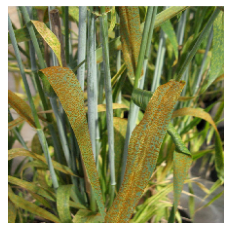

In [10]:

from matplotlib import pyplot as plt

file = tf.keras.utils.get_file("/content/0FX4J2.png","/content/0FX4J2.png")
img = tf.keras.preprocessing.image.load_img(file, target_size=[224, 224])
plt.imshow(img)
plt.axis('off')
x = tf.keras.preprocessing.image.img_to_array(img)
x = tf.keras.applications.mobilenet.preprocess_input(
    x[tf.newaxis,...])

In [11]:
model.predict_classes

<bound method Sequential.predict_classes of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f06c5aa07f0>>

In [12]:
classes=['healthy_tomato','healthy_wheat','unhealthy_tomato','unhealthy_wheat']

y_prob = model.predict(x) 
y_classes = y_prob.argmax(axis=-1)
y_prob
classes[y_classes[0]]

'unhealthy_wheat'

In [ ]:
y_classes

array([3])